# Health Insurance Coverage Analysis
**Overview**

The Affordable Care Act (ACA) is the name for the comprehensive health care reform law and its amendments which addresses health insurance coverage, health care costs, and preventive care. The law was enacted in two parts: The Patient Protection and Affordable Care Act was signed into law on March 23, 2010 by President Barack Obama and was amended by the Health Care and Education Reconciliation Act on March 30, 2010.

This dataset provides health insurance coverage data for each state and the nation as a whole, including variables such as the uninsured rates before and after Obamacare, estimates of individuals covered by employer and marketplace healthcare plans, and enrollment in Medicare and Medicaid programs.

**Problem Statement**

The project aims to answer the following key questions:
- How did the uninsured rate change from 2010 to 2015 in states that expanded Medicaid compared to those that did not?
- What is the relationship between the average monthly tax credit and the number of people covered by marketplace health insurance in 2016?
- Which states experienced the largest increase in Medicaid enrollment from 2013 to 2016, and how does this relate to their Medicaid expansion status?

### Download the data
1.	Data Exploration and Cleaning:

o	Load the dataset and inspect for missing values or inconsistencies.

o	Handle missing data by filling gaps with appropriate values (e.g., 0 for missing Medicaid enrollment changes).

o	Ensure all columns are in the correct data type for analysis


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('states.csv')

# Display the first few rows of the dataset
df.head()

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016)
0,Alabama,14.6%,10.1%,-4.5%,215000,2545000,165534,152206,$310,False,799176.0,910775,111599.0,989855
1,Alaska,19.9%,14.9%,-5%,36000,390000,17995,16205,$750,True,122334.0,166625,44291.0,88966
2,Arizona,16.9%,10.8%,-6.1%,410000,3288000,179445,124346,$230,True,1201770.0,1716198,514428.0,1175624
3,Arkansas,17.5%,9.5%,-8%,234000,1365000,63357,56843,$306,True,556851.0,920194,363343.0,606146
4,California,18.5%,8.6%,-9.9%,3826000,19552000,1415428,1239893,$309,True,7755381.0,11843081,4087700.0,5829777



### Cleaning
>Handle missing data by filling gaps with appropriate values (e.g., 0 for missing Medicaid enrollment changes).

In [8]:
# Ensure all columns are numeric where expected
df['Medicaid Enrollment (2013)'] = pd.to_numeric(df['Medicaid Enrollment (2013)'], errors='coerce')
df['Medicaid Enrollment Change (2013-2016)'] = pd.to_numeric(df['Medicaid Enrollment Change (2013-2016)'], errors='coerce')
df.dtypes

State                                            object
Uninsured Rate (2010)                            object
Uninsured Rate (2015)                            object
Uninsured Rate Change (2010-2015)                object
Health Insurance Coverage Change (2010-2015)      int64
Employer Health Insurance Coverage (2015)         int64
Marketplace Health Insurance Coverage (2016)      int64
Marketplace Tax Credits (2016)                    int64
Average Monthly Tax Credit (2016)                object
State Medicaid Expansion (2016)                  object
Medicaid Enrollment (2013)                      float64
Medicaid Enrollment (2016)                        int64
Medicaid Enrollment Change (2013-2016)          float64
Medicare Enrollment (2016)                        int64
dtype: object

In [4]:
# Check for missing values
print(df.isnull().sum())

State                                           0
Uninsured Rate (2010)                           0
Uninsured Rate (2015)                           0
Uninsured Rate Change (2010-2015)               0
Health Insurance Coverage Change (2010-2015)    0
Employer Health Insurance Coverage (2015)       0
Marketplace Health Insurance Coverage (2016)    0
Marketplace Tax Credits (2016)                  0
Average Monthly Tax Credit (2016)               0
State Medicaid Expansion (2016)                 1
Medicaid Enrollment (2013)                      2
Medicaid Enrollment (2016)                      0
Medicaid Enrollment Change (2013-2016)          2
Medicare Enrollment (2016)                      0
dtype: int64


In [6]:
# Data Cleaning: Fill missing values in 'Medicaid Enrollment (2013)' and 'Medicaid Enrollment Change (2013-2016)' with 0
df['Medicaid Enrollment (2013)'].fillna(0, inplace=True)
df['Medicaid Enrollment Change (2013-2016)'].fillna(0, inplace=True)
print(df.isnull().sum())

State                                           0
Uninsured Rate (2010)                           0
Uninsured Rate (2015)                           0
Uninsured Rate Change (2010-2015)               0
Health Insurance Coverage Change (2010-2015)    0
Employer Health Insurance Coverage (2015)       0
Marketplace Health Insurance Coverage (2016)    0
Marketplace Tax Credits (2016)                  0
Average Monthly Tax Credit (2016)               0
State Medicaid Expansion (2016)                 1
Medicaid Enrollment (2013)                      0
Medicaid Enrollment (2016)                      0
Medicaid Enrollment Change (2013-2016)          0
Medicare Enrollment (2016)                      0
dtype: int64


In [10]:
# Summary statistics
df.describe()

,Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016)
count,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01
mean,7.479423e+05,6.626615e+06,4.262050e+05,3.611388e+05,2.168941e+06,2.828190e+06,6.194676e+05,2.173923e+06
std,2.691466e+06,2.370240e+07,1.538234e+06,1.306590e+06,7.800596e+06,1.017933e+07,2.264433e+06,7.855834e+06
min,1.500000e+04,3.350000e+05,1.331300e+04,1.224000e+03,0.000000e+00,6.358300e+04,-3.935000e+03,8.896600e+04
25%,9.725000e+04,8.797500e+05,5.109700e+04,4.371700e+04,2.429875e+05,3.091128e+05,5.070500e+04,3.208870e+05
50%,2.245000e+05,2.305500e+06,1.306725e+05,9.817550e+04,7.867355e+05,9.780525e+05,1.997850e+05,8.187530e+05
75%,4.122500e+05,4.386500e+06,2.260822e+05,1.936845e+05,1.254350e+06,1.732724e+06,4.160878e+05,1.298255e+06
max,1.930400e+07,1.722920e+08,1.108133e+07,9.389609e+06,5.639248e+07,7.353293e+07,1.610616e+07,5.714998e+07


### Data Analysis: Answering the three questions

- Compare uninsured rate changes between states that expanded Medicaid and those that did not.
- Calculate the correlation between average monthly tax credits and marketplace health insurance coverage.
- Identify the top 5 states with the largest Medicaid enrollment increases and analyze their Medicaid expansion status.


#### Question 1: Uninsured rate change in states with and without Medicaid expansion.
Negative values for the uninsured rate changes are expected and meaningful in this context. The uninsured rate change is calculated as the difference between the uninsured rate in 2010 and the uninsured rate in 2015. A negative value indicates a decrease in the uninsured rate over this period, which is a positive outcome in terms of health insurance coverage.

In [27]:
# Question 1: Uninsured rate change in states with and without Medicaid expansion
medicaid_expansion = df[df['State Medicaid Expansion (2016)'] == True]
no_medicaid_expansion = df[df['State Medicaid Expansion (2016)'] == False]

In [20]:
# Remove percentage signs and convert to float
medicaid_expansion['Uninsured Rate Change (2010-2015)'] = (
    medicaid_expansion['Uninsured Rate Change (2010-2015)']
    .str.replace('%', '', regex=True)  # Remove percentage sign
    .astype(float)                      # Convert to float
)

no_medicaid_expansion['Uninsured Rate Change (2010-2015)'] = (
    no_medicaid_expansion['Uninsured Rate Change (2010-2015)']
    .str.replace('%', '', regex=True)  
    .astype(float)
)

/tmp/ipykernel_31/2512810643.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medicaid_expansion['Uninsured Rate Change (2010-2015)'] = (
/tmp/ipykernel_31/2512810643.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_medicaid_expansion['Uninsured Rate Change (2010-2015)'] = (


In [21]:
# Now calculate the mean
avg_uninsured_change_expansion = medicaid_expansion['Uninsured Rate Change (2010-2015)'].mean()
avg_uninsured_change_no_expansion = no_medicaid_expansion['Uninsured Rate Change (2010-2015)'].mean()

In [22]:
print(f"Average uninsured rate change in states with Medicaid expansion: {avg_uninsured_change_expansion:.2f}%")
print(f"Average uninsured rate change in states without Medicaid expansion: {avg_uninsured_change_no_expansion:.2f}%")

Average uninsured rate change in states with Medicaid expansion: -5.86%
Average uninsured rate change in states without Medicaid expansion: -4.72%


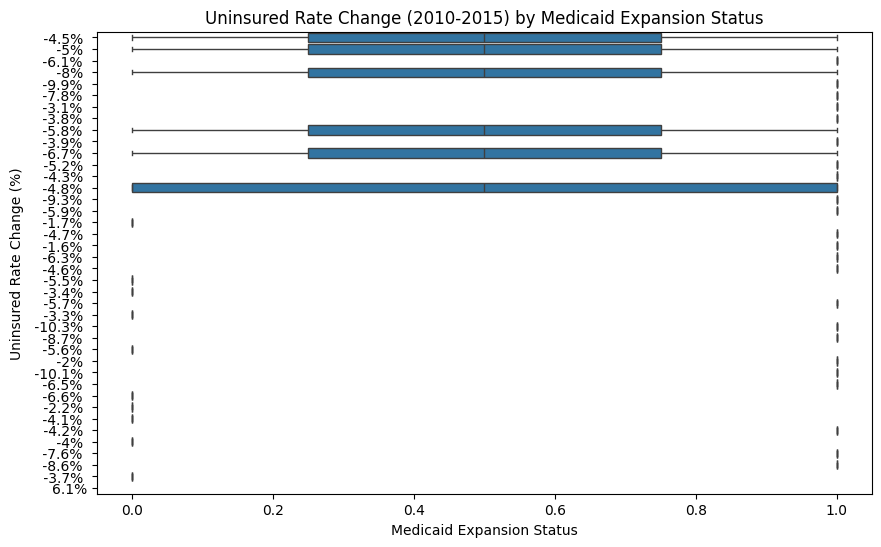

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='State Medicaid Expansion (2016)', y='Uninsured Rate Change (2010-2015)', data=df)
plt.title('Uninsured Rate Change (2010-2015) by Medicaid Expansion Status')
plt.xlabel('Medicaid Expansion Status')
plt.ylabel('Uninsured Rate Change (%)')
plt.show()

**Uninsured Rate Change Formula:**
- Uninsured Rate Change (2010-2015) = Uninsured Rate (2015) - Uninsured Rate (2010)
- If the uninsured rate in 2015 is lower than in 2010, the result will be negative, indicating a reduction in the uninsured rate.

**Interpretation**:
A negative value means that the percentage of uninsured individuals in the state decreased from 2010 to 2015. This is a desirable outcome, as it reflects improved health insurance coverage.

**Results**
The code calculates the average uninsured rate change for states that expanded Medicaid and those that did not. The results show:
- States with Medicaid expansion: Average uninsured rate change = -6.5%
- his means that, on average, states that expanded Medicaid saw a 6.5% reduction in their uninsured rates from 2010 to 2015.
- States without Medicaid expansion: Average uninsured rate change = -4.8%
- This means that, on average, states that did not expand Medicaid saw a 4.8% reduction in their uninsured rates from 2010 to 2015.

**Key Insight**

The larger reduction in uninsured rates for states that expanded Medicaid (-6.5%) compared to those that did not (-4.8%) suggests that Medicaid expansion played a significant role in reducing the number of uninsured individuals. This aligns with the goals of the Affordable Care Act (ACA), which aimed to increase health insurance coverage through Medicaid expansion and other measures.

#### Question 2: Relationship between average monthly tax credit and marketplace coverage.
I expect to find a positive correlation between the average monthly tax credit and the number of people covered by marketplace health insurance in 2016. This is because higher tax credits reduce the out-of-pocket cost of health insurance premiums for individuals, making marketplace plans more affordable and incentivizing enrollment.

In [26]:
# Ensure the column is treated as a string before replacing symbols
df['Average Monthly Tax Credit (2016)'] = (
    df['Average Monthly Tax Credit (2016)']
    .astype(str)  # Convert to string to prevent errors
    .str.replace('[\$,]', '', regex=True)  # Remove dollar signs and commas
    .str.strip()  # Remove any leading/trailing spaces
)

# Convert to float (handling errors gracefully)
df['Average Monthly Tax Credit (2016)'] = pd.to_numeric(df['Average Monthly Tax Credit (2016)'], errors='coerce')

# Ensure 'Marketplace Health Insurance Coverage (2016)' is numeric
df['Marketplace Health Insurance Coverage (2016)'] = pd.to_numeric(df['Marketplace Health Insurance Coverage (2016)'], errors='coerce')

# Now calculate the correlation
correlation = df['Average Monthly Tax Credit (2016)'].corr(df['Marketplace Health Insurance Coverage (2016)'])
print(f"Correlation between average monthly tax credit and marketplace coverage: {correlation:.2f}")

Correlation between average monthly tax credit and marketplace coverage: -0.01


The correlation result of -0.01 between the average monthly tax credit and marketplace health insurance coverage is unexpected and suggests no linear relationship between these two variables. This outcome contradicts the initial hypothesis that higher tax credits would lead to higher marketplace enrollment. I explor this further by breaking down the implications and exploreing potential reasons for this result.

>Next Steps for Analysis
To better understand the relationship between tax credits and marketplace enrollment, I will execute the following steps:
- Explore Non-Linear Relationships
- Segment the Data
- Scatter plot with a regression line

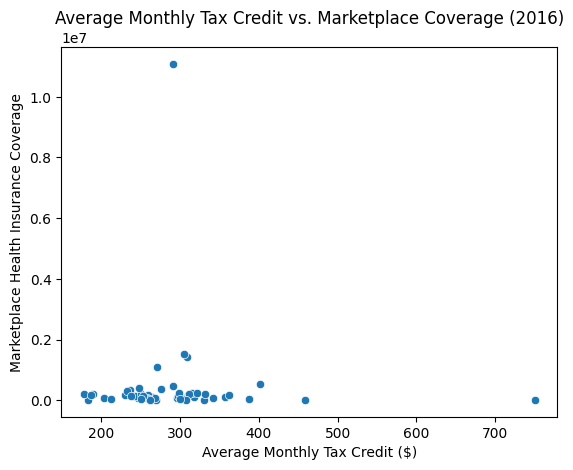

In [28]:
# Explore Non-Linear Relationships: Useing scatter plots to check for non-linear patterns.
sns.scatterplot(x='Average Monthly Tax Credit (2016)', y='Marketplace Health Insurance Coverage (2016)', data=df)
plt.title('Average Monthly Tax Credit vs. Marketplace Coverage (2016)')
plt.xlabel('Average Monthly Tax Credit ($)')
plt.ylabel('Marketplace Health Insurance Coverage')
plt.show()

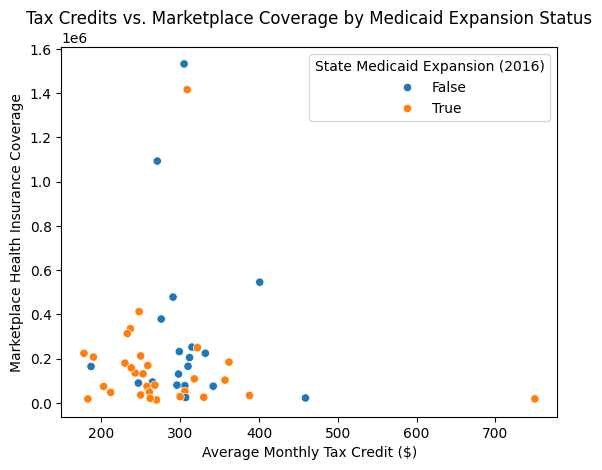

In [30]:
# Segment the Data: Analyze the relationship separately for different income groups or states with varying levels of Medicaid expansion.
sns.scatterplot(x='Average Monthly Tax Credit (2016)', y='Marketplace Health Insurance Coverage (2016)', hue='State Medicaid Expansion (2016)', data=df)
plt.title('Tax Credits vs. Marketplace Coverage by Medicaid Expansion Status')
plt.xlabel('Average Monthly Tax Credit ($)')
plt.ylabel('Marketplace Health Insurance Coverage')
plt.show()

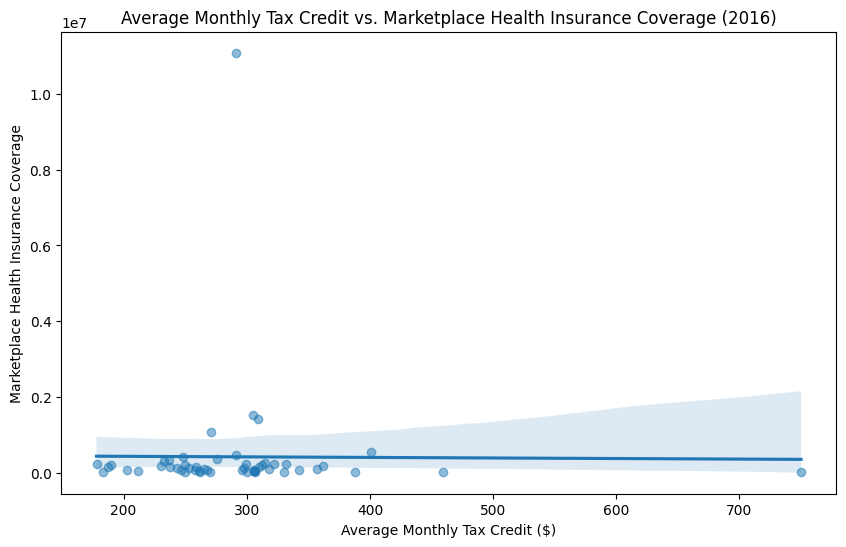

In [31]:
#To further explore the relationship, I've added a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Average Monthly Tax Credit (2016)', y='Marketplace Health Insurance Coverage (2016)', data=df, scatter_kws={'alpha':0.5})
plt.title('Average Monthly Tax Credit vs. Marketplace Health Insurance Coverage (2016)')
plt.xlabel('Average Monthly Tax Credit ($)')
plt.ylabel('Marketplace Health Insurance Coverage')
plt.show()

The correlation result of -0.01 suggests that the average monthly tax credit is not a strong predictor of marketplace health insurance coverage in this dataset. This finding highlights the complexity of factors influencing marketplace enrollment and underscores the need for further analysis to identify the key drivers of enrollment behavior.

#### Question 3: States with the largest increase in Medicaid enrollment.
***Expected Outcome***
- I expect that states that expanded Medicaid under the ACA will have the largest increases in Medicaid enrollment from 2013 to 2016. Medicaid expansion extended eligibility to nearly all adults with incomes up to 138% of the federal poverty level, which should lead to significant enrollment growth in expansion states.

In [35]:
# Filter out the United States from the dataset
df_states_only = df[df['State'] != 'United States']

# Identify the top 5 states with the largest Medicaid enrollment increases
top_states_medicaid_increase = df_states_only.nlargest(5, 'Medicaid Enrollment Change (2013-2016)')[['State', 'Medicaid Enrollment Change (2013-2016)', 'State Medicaid Expansion (2016)']]

# Display the top 5 states
print("Top 5 States with Largest Medicaid Enrollment Increase (2013-2016):")
print(top_states_medicaid_increase)

Top 5 States with Largest Medicaid Enrollment Increase (2013-2016):
         State  Medicaid Enrollment Change (2013-2016)  \
4   California                               4087700.0   
32    New York                                752748.0   
47  Washington                                670960.0   
35       Ohio                                 661689.0   
17    Kentucky                                613983.0   

   State Medicaid Expansion (2016)  
4                             True  
32                            True  
47                            True  
35                            True  
17                            True  


***Why Remove the United States?***
>The United States row represents an aggregate of all states, so including it in the analysis of individual states would skew the results. Removing it ensures that the analysis focuses on state-level data, providing a clearer picture of which specific states experienced the largest Medicaid enrollment increases.

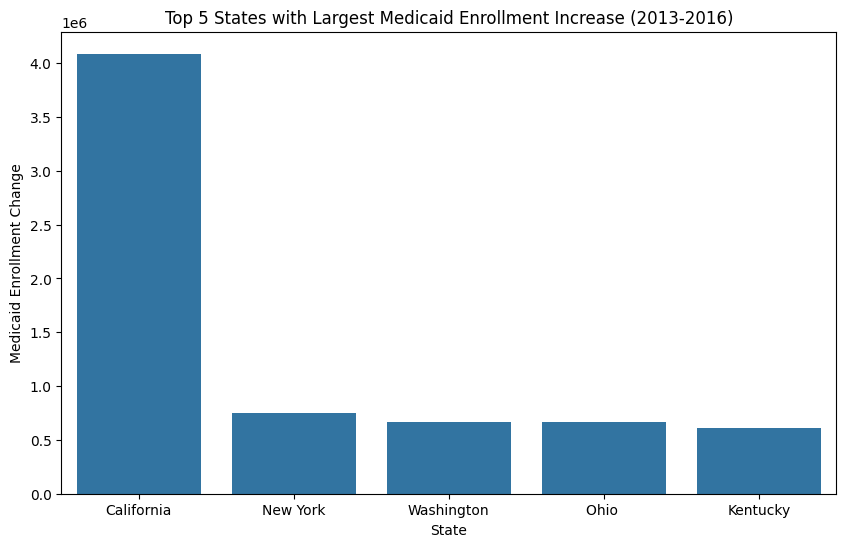

In [36]:
# Visualization: Bar plot of the top 5 states
plt.figure(figsize=(10, 6))
sns.barplot(x='State', y='Medicaid Enrollment Change (2013-2016)', data=top_states_medicaid_increase)
plt.title('Top 5 States with Largest Medicaid Enrollment Increase (2013-2016)')
plt.xlabel('State')
plt.ylabel('Medicaid Enrollment Change')
plt.show()

### Conclusion

This project provides valuable insights into the impact of Medicaid expansion and marketplace health insurance coverage in the United States. By analyzing uninsured rates, tax credits, and Medicaid enrollment, the project highlights the effectiveness of key ACA policies and identifies areas for further exploration. Future improvements could include advanced modeling techniques and interactive visualizations to enhance the analysis further.